# Confusion Matrix


A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

Confusion matrix:
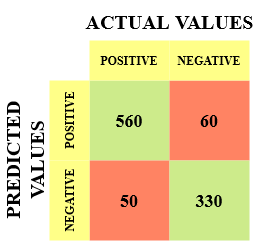


The target variable has two values: Positive or Negative
The columns represent the actual values of the target variable
The rows represent the predicted values of the target variable
TP, FP, FN and TN here? That’s the crucial part of a confusion matrix. Let’s understand each term below.

# True Positive (TP) 

The predicted value matches the actual value.

The actual value was positive and the model predicted a positive value.

# True Negative (TN)

The predicted value matches the actual value.

The actual value was negative and the model predicted a negative value.

# False Positive (FP) – Type 1 error

The predicted value was falsely predicted.

The actual value was negative but the model predicted a positive value Also known as the Type 1 error.

# False Negative (FN) – Type 2 error

The predicted value was falsely predicted.

The actual value was positive but the model predicted a negative value Also known as the Type 2 error

# Precision
Precision tells us how many of the correctly predicted cases actually turned out to be positive.

Formula for Precision: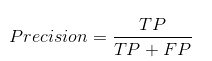

    
   
    
  
Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.



# Recall
Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

Fromula for Recall:
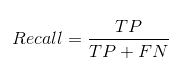


   
    



Recall is a useful metric in cases where False Negative trumps False Positive.




# F1-Score
F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

F1-score:

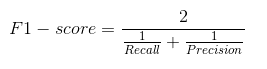






In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
 df=pd.read_csv('C:/Users/deshm/Desktop/dataml/diabetes.csv')
 df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

C:\Users\deshm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

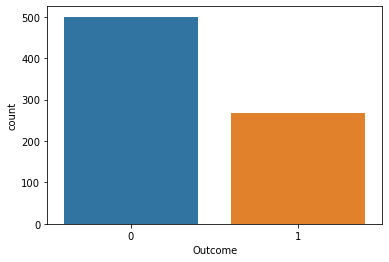

In [6]:
#Count of Outcome
sns.countplot(df['Outcome'])

In [20]:
#train_test_split
X =df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [21]:
#Model selection
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X,Y)

C:\Users\deshm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

C:\Users\deshm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\deshm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


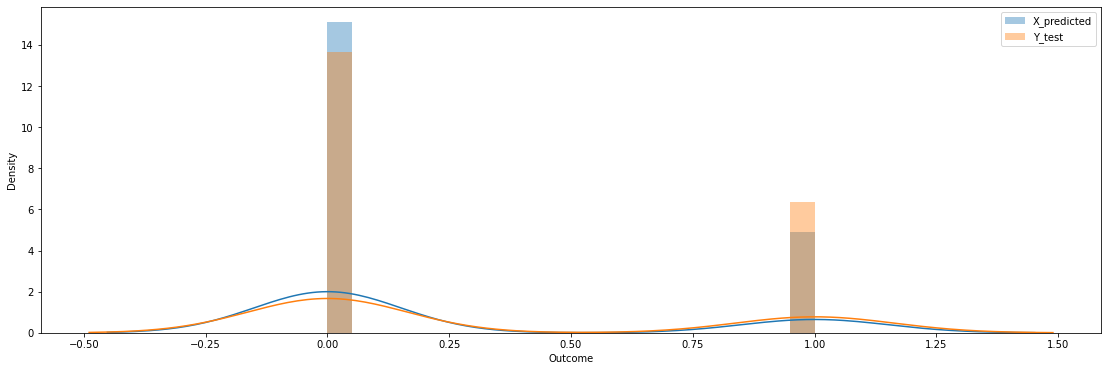

In [22]:

plt.figure(figsize=(19,6))
sns.distplot(q,bins=20,label="X_predicted")
sns.distplot(Y_test,bins=20,label="Y_test")
plt.legend()

# Confusion matrix

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(Y_test,log.predict(X_test))

array([[114,  17],
       [ 21,  40]], dtype=int64)

# Precision and Recall

In [25]:
# Precision and Recall
from sklearn.metrics import precision_score,recall_score


In [26]:
#precision score
precision_score(Y_test,log.predict(X_test))

0.7017543859649122

In [27]:
#recall score
recall_score(Y_test,log.predict(X_test))

0.6557377049180327

# F-Score

In [28]:
#f-scpre
from sklearn.metrics import f1_score
f1_score(Y_test,log.predict(X_test))

0.6779661016949152